## Importing relevant libraries

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import glob
import os
import pickle

from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

RSEED = 42


## Import the data

<span style='color:orange '> The data consists of several .csv files, all in the same format. Every dataset contains thousands of observations. To work with it, we have to import the data and concatenate them to a big data frame.</span>

In [30]:
#Import the data and concatenate them to one big dataframe. If your data is in another directory, use the path of this!

path = r'data' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)


## EDA

<span style='color:orange '> The kickstarter data set is a huge data set with over 200.000 observations about kickstarter projects. It contains many direct project information like time, goals, currency, information about creator, descriptions, information about sharing, photo and so on.  </span>

The dataset used in this project was downloaded in .csv format from a webscrape conducted by a webscraping site called [Web Robots](https://webrobots.io/kickstarter-datasets/). The dataset contains data on all projects hosted on Kickstarter between the company's launch in April 2009, up until the date of the webscrape on 14 March 2019.

## Description of the culomns

The data set information is separated in 37 columns shown below:

- 'backers_count' 
- 'blurb'
- 'converted_pledged_amount'
- 'country'
- 'created_at'
- 'currency'
- 'currency_symbol'
- 'currency_trailing_code'
- 'current_currency'
- 'deadline'
- 'disable_communication'
- 'friends'
- 'fx_rate'
- 'goal'
- 'id'
- 'is_backing'
- 'is_starrable'
- 'is_starred'
- 'launched_at'
- 'name'
- 'permissions'
- 'pledged'
- 'slug'
- 'spotlight'
- 'staff_pick'
- 'state'
- 'state_changed_at'
- 'static_usd_rate'
- 'usd_pledged'
- 'usd_type'

Following columns are dictionarys which contains more information:

- 'category'
- 'creator'
- 'location'
- 'profile'
- 'urls'
- 'photo'

Following columns are URL's:


- 'source_url'

In [31]:
#here is a quick look on the data, we set the option, that we see all columns
pd.set_option('display.max_columns', None)
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.000000,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.000000,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.000000,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,NaN,1.308394,10000.0,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.0,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,NaN,1.000000,2800.0,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.0,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [32]:
#overview the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

## Data Cleaning

<span style='color:orange '> For Data Cleaning, we want to keep only the data which is useful for us. We also have to change data, extract data out of the dictionary columns, transform data types and get rid of categorical data to make our models work  </span>

We want to extract the slug name out of the category column dictionary and separate the main genre out of it.

In [33]:

# we have a string in the format of a dictionary so we transform the string to a dictionary
df['category'] = df['category'].apply(lambda x: ast.literal_eval(x))
#then we can extract the information of the key: slug in the dictionary.
df['category_slug'] = df['category'].apply(lambda x: x.get('slug'))
#we get back a string with a combination of two genres,separated by a /. We only want to have the first one,
#so we split by / and select only the first entry of the now list of splitted words.
df['category_slug'] = df['category_slug'].apply(lambda x: x.split("/")[0])
#show the genres of the projects
df['category_slug']

0              fashion
1                games
2                music
3                games
4           publishing
              ...     
209217           games
209218           music
209219      technology
209220    film & video
209221      journalism
Name: category_slug, Length: 209222, dtype: object


# Candidates columns to be deleted:

<span style='color:red'>

> *blurb* : only non qualitativ descriptive information about the project 

> *category*: we keep it for future model processing. The values of this column are dictionary packed as string. It dosen't provide us directly with a quantitative value. Later may be we extract some usefull numerical information from it. 

> *creators* : same reasons as for categories  

> *currency_symbol*

> *currency_trailing_code*

> *slug*

> *source_url*

> *spotlight*

> *state_usd_rate*

> *urls*

> *friends* : it contains just NaN and "[ ]".

> *fx_rate* 

> *id*

> *is_starred*

> *is_backing*

> *location*

> *permissions*

> *photo*

> *pledged*

> *name*

> *profile*

</span>

# candidates for dummies

<span style='color:yellow'>

> *country*

> *currency*

</span>

# candidate representing dates

<span style='color:yellow'>

> *created_at* 

> *deadline*

> *state_changed_at*

> *launched_at*

</span>

# Target :

<span style='color:green'>

> state

</span>

As we see in the foolowing code the currency, currency_symbol and currency_trailing_code are completly correlated. So we can delete two of them.

In [34]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['currency_symbol']=='€') & (df['currency_trailing_code']==True)])

0

In [35]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['friends'].isnull()) & (df['state']=="successful")])

117465

Here we delete the clomuns we don't need!

In [36]:
# in this cell we delete the unwanted columns!
df_1= df.drop(['blurb', 'category', 'creator', 'currency_symbol',
       'currency_trailing_code', 'friends', 'fx_rate', 'id',
       'is_backing', 'is_starred', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight',
       'static_usd_rate', 'urls'], axis=1)

In [37]:
df_1.head(5)

,backers_count,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,goal,is_starrable,launched_at,staff_pick,state,state_changed_at,usd_pledged,usd_type,category_slug
0,315,28645,US,1541459205,USD,USD,1552539775,False,28000.0,False,1548223375,False,live,1548223375,28645.000000,international,fashion
1,47,1950,US,1501684093,USD,USD,1504976459,False,1000.0,False,1502384459,False,successful,1504976459,1950.000000,domestic,games
2,271,22404,US,1348987533,USD,USD,1371013395,False,15000.0,False,1368421395,False,successful,1371013395,22404.000000,international,music
3,3,165,GB,1483780271,GBP,USD,1489425776,False,10000.0,False,1484245376,False,failed,1489425776,165.384934,domestic,games
4,3,2820,US,1354817071,USD,USD,1357763527,False,2800.0,False,1355171527,False,successful,1357763527,2820.000000,domestic,publishing


We have to delete the data which is not useful for our target. We only want to have the state successful and failed.
After this we want only 0s and 1s in this column to train our models, so we replace the values respectively

In [38]:
# we delete all rows of the dataframe with the state value of "live", "cancelled","suspended". 
# Because this rows do not tell us an thing about the succeed of the project.

df_1 = df_1[(df_1.state != "live")] 
df_1 = df_1[(df_1.state != "canceled")] 
df_1 = df_1[(df_1.state != "suspended")] 

# Alternative way
# df_1 = df_1.drop(df_1[(df_1.state== "live") & (df_1.state=="suspended") & (df_1.state=="canceled")].index)


In [39]:
# Now we replace "successful" and "failed" with "1" and "o respectively". These are the values of our target column.
df_1["state"] = df_1["state"].replace(["successful", "failed"], [1, 0])

In [40]:
# we round the values of usd_pledged and goal
df_1[["goal","usd_pledged"]]=df_1[["goal","usd_pledged"]].round(0)

In [41]:
# we reset the index!
df_1 = df_1.reset_index(drop=True)

In [42]:
# As we see in the table above the features "disable_communication" and "is_starrable" just take one single value,
# meanings that they constant. Therefore they do not provide us with any new insight into the data. 
# Therefore we delete the corresponding columns.
df_1= df_1.drop(["disable_communication", "is_starrable"], axis=1)

Let's have a look on the number of unique values in the different columns to check where the categorical columns are:

In [43]:
df_1.nunique()

backers_count                 3206
converted_pledged_amount     30787
country                         22
created_at                  168890
currency                        14
current_currency                 2
deadline                    158484
goal                          4804
launched_at                 168847
staff_pick                       2
state                            2
state_changed_at            158780
usd_pledged                  30775
usd_type                         2
category_slug                   15
dtype: int64

--- May be we should remove the "country from dummie-list"---

In [44]:
# In this cell we convert all categorical variable in dummies, so we can work in models.
df_2 = pd.get_dummies(df_1, columns=["country", "currency", "current_currency", "staff_pick", "usd_type","category_slug"])

'''
# Here is an alternative approach
# Using make_column_transformer to One-Hot Encode

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

transformer = make_column_transformer(
    (OneHotEncoder(), ['country']),
    remainder='passthrough')

transformed = transformer.fit_transform(df_1)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
'''

"\n# Here is an alternative approach\n# Using make_column_transformer to One-Hot Encode\n\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import make_column_transformer\nfrom seaborn import load_dataset\n\ntransformer = make_column_transformer(\n    (OneHotEncoder(), ['country']),\n    remainder='passthrough')\n\ntransformed = transformer.fit_transform(df_1)\ntransformed_df = pd.DataFrame(\n    transformed, \n    columns=transformer.get_feature_names()\n)\n"

## Problem 

We recognized by modelling, that our predictions are perfect, so we assumed that we have to many data.
So we figured out that we can't know some things when we start a project and we have to drop more data out of the data frame.
These are:

- usd_pledged
- converted_pledged_amount
- backers_count

For the timestamps we recognized that state_changed_at is closely the same time( only some seconds difference) to deadline
so we will drop this also

- state_changed_at

In [45]:
df_2 = df_2.drop(['usd_pledged','converted_pledged_amount','backers_count','state_changed_at'], axis = 1)

In [46]:
# df_2 is the clean data with essential preproccessing steps done on it!

df_2

os.makedirs('data/data_preproccessed', exist_ok=True)  
df_2.to_csv('data/data_preproccessed/data_2.csv') 

<AxesSubplot:xlabel='state', ylabel='goal'>

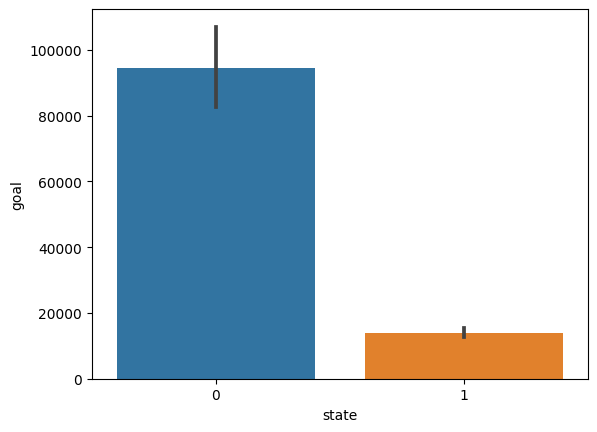

In [47]:
pd.set_option('display.max_columns', None)

#df_2.corr()

sns.barplot(data=df_2, x="state", y="goal")

<AxesSubplot:xlabel='state', ylabel='goal'>

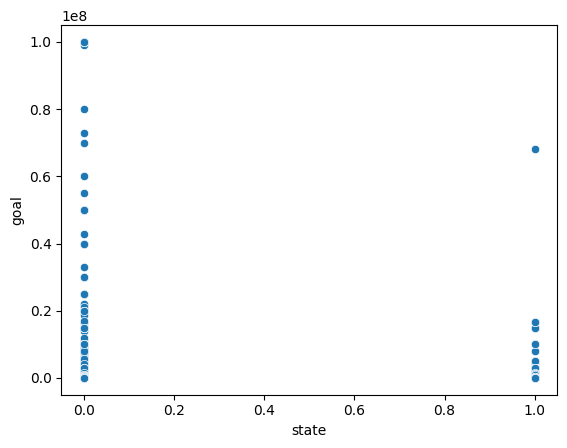

In [48]:
sns.scatterplot(data=df_2, x="state", y="goal")

In [49]:
df_2['state'].value_counts()

1    117465
0     75199
Name: state, dtype: int64

In [50]:
column_list = ['created_at', 'deadline', 'goal', 'launched_at', 'state', 'country_AT',
       'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE',
       'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK',
       'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX',
       'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG',
       'country_US', 'currency_AUD', 'currency_CAD', 'currency_CHF',
       'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD',
       'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD',
       'currency_SEK', 'currency_SGD', 'currency_USD', 'current_currency_CAD',
       'current_currency_USD', 'staff_pick_False', 'staff_pick_True',
       'usd_type_domestic', 'usd_type_international', 'category_slug_art',
       'category_slug_comics', 'category_slug_crafts', 'category_slug_dance',
       'category_slug_design', 'category_slug_fashion',
       'category_slug_film & video', 'category_slug_food',
       'category_slug_games', 'category_slug_journalism',
       'category_slug_music', 'category_slug_photography',
       'category_slug_publishing', 'category_slug_technology',
       'category_slug_theater']

In [51]:
for column in column_list:
    if column in df_2.columns:
        continue
    else:
        df_2[column] = 0
        

In [52]:
df_2.head()

,created_at,deadline,goal,launched_at,state,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_CAD,current_currency_USD,staff_pick_False,staff_pick_True,usd_type_domestic,usd_type_international,category_slug_art,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater
0,1501684093,1504976459,1000.0,1502384459,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1348987533,1371013395,15000.0,1368421395,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1483780271,1489425776,10000.0,1484245376,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1354817071,1357763527,2800.0,1355171527,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1414172150,1430533546,3500.0,1427941546,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Splitting and the data

For our models we need to split our data frame into test and train data set. Out of this we can do our baseline and big model.
At first we have to define our target and our features for the models.

In [53]:
X = df_2.drop('state', axis= 1)
y = df_2['state']

print('Our features are:', list(X.columns))
print('Our target is: state')

Our features are: ['created_at', 'deadline', 'goal', 'launched_at', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD', 'current_currency_CAD', 'current_currency_USD', 'staff_pick_False', 'staff_pick_True', 'usd_type_domestic', 'usd_type_international', 'category_slug_art', 'category_slug_comics', 'category_slug_crafts', 'category_slug_dance', 'category_slug_design', 'category_slug_fashion', 'category_slug_film & video', 'category_slug_food', 'category_slug_games', 'category_slug_journalism', 'category_slug_music',

In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify = y, random_state=RSEED)
'''We stratify the test split because we have an imbalance in the state column of the dataset'''

print('Rows and columns of X_train', X_train.shape)
print('Rows and columns of y_train', y_train.shape)
print('Rows and columns of X_test', X_test.shape)
print('Rows and columns of y_test', y_test.shape)

X_test.to_csv('data/data_preproccessed/X_test.csv')
y_test.to_csv('data/data_preproccessed/y_test.csv') 

Rows and columns of X_train (129084, 61)
Rows and columns of y_train (129084,)
Rows and columns of X_test (63580, 61)
Rows and columns of y_test (63580,)


## Base model and Base model evaluation

Our hypothesis is: 

    If the goal is lower than 20000 the project is more likely to succeed

In [55]:
#to evaluate our baseline model we need a y_baseline. We decided that we have a successful project below 20000 so i will be 1.
# over 20000 i will be 0 for no success. So we can compare y_baseline with y_test to evaluate the model.
y_baseline = [1 if i <= 20000 else 0 for i in X_test['goal']]
y_baseline = np.array(y_baseline)
y_baseline

array([1, 1, 1, ..., 1, 0, 0])

In [56]:
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_baseline)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_baseline)

print(cfm)


---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.27      0.37     24816
           1       0.66      0.89      0.76     38764

    accuracy                           0.65     63580
   macro avg       0.64      0.58      0.57     63580
weighted avg       0.64      0.65      0.61     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[ 6677 18139]
 [ 4139 34625]]


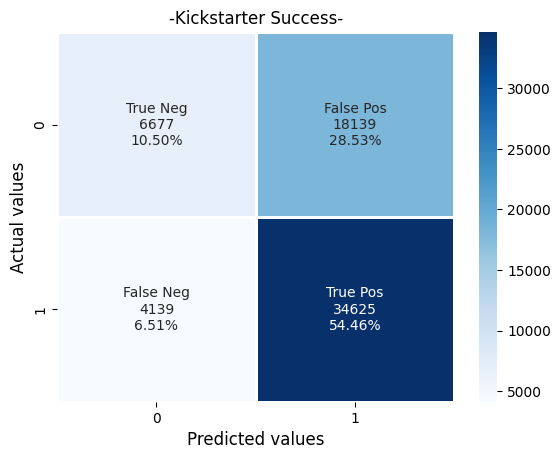

In [57]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

## Scaling all numerical data in our data frame

In [58]:
# Initialize a scaler, then apply it to the features which are numerical and we want to scale 
num = ['created_at', 'deadline', 'goal', 'launched_at']

scaler = StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

# Show an example of a record with scaling applied
X_train.head()

,created_at,deadline,goal,launched_at,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_CAD,current_currency_USD,staff_pick_False,staff_pick_True,usd_type_domestic,usd_type_international,category_slug_art,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater
24364,-0.222365,-0.314065,-0.038891,-0.289581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
165633,1.128730,1.067766,-0.039634,1.076723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157031,-0.877612,-0.910856,-0.032414,-0.909598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
49783,0.181384,0.113233,-0.039209,0.116454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,-0.648533,-0.656351,-0.035812,-0.644543,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63580 entries, 30327 to 126598
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_at                  63580 non-null  float64
 1   deadline                    63580 non-null  float64
 2   goal                        63580 non-null  float64
 3   launched_at                 63580 non-null  float64
 4   country_AT                  63580 non-null  uint8  
 5   country_AU                  63580 non-null  uint8  
 6   country_BE                  63580 non-null  uint8  
 7   country_CA                  63580 non-null  uint8  
 8   country_CH                  63580 non-null  uint8  
 9   country_DE                  63580 non-null  uint8  
 10  country_DK                  63580 non-null  uint8  
 11  country_ES                  63580 non-null  uint8  
 12  country_FR                  63580 non-null  uint8  
 13  country_GB                

## Creating different Models

In this case we have a classification problem, where we want to predict whether a project/campaign on kickstarter will succeed or net.
To classify them we will go for following models:

1. Decision Tree
2. XGBoost
3. KNNeighbors 
4. Random Forest

We will try them all and compare them at the end, to show which model performs best.




In [71]:
#Import relevant classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import xgboost as xgb

## 1. Decision Tree

In [72]:
dtc = DecisionTreeClassifier(random_state=RSEED)
dtc.fit(X_train, y_train, sample_weight=None, check_input=True)

DecisionTreeClassifier(random_state=42)

In [73]:
#make prediction for classifier above

y_pred_dt = dtc.predict(X_test)
y_pred_dt

array([0, 1, 1, ..., 0, 0, 1])

In [74]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [75]:
#to tune our models we have find best parameters with GridSearchCV 
grid = GridSearchCV(estimator=dtc,
        param_grid={"max_depth": [2, 3, 4, 5, 6, 8, 10],
        'criterion': ['gini','entropy','log_loss'],
        'max_leaf_nodes': [2, 3, 4, 5, 6, 8, 10, 12, 14]},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_dtc = grid.best_estimator_

y_pred_dt_gc = best_model_dtc.predict(X_test)

print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")

Best model has the following params:{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2} and the best estimator is:DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, random_state=42)


## XGboost Classifier

In [76]:
boost = xgb.XGBClassifier(random_state=RSEED)
model_xgboost= boost.fit(X_train,y_train)

In [77]:
#make prediction for classifier above

y_pred_boost = boost.predict(X_test)
y_pred_boost

array([1, 1, 1, ..., 0, 0, 0])

In [78]:
boost.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)>

In [79]:
#to tune our models we have find best parameters with GridSearchCV 
grid = GridSearchCV(estimator=boost,
        param_grid={"base_score": [0.3,0.5,0.6],
        'learning_rate': [0.1, 1, 10],
        'max_depth': [2, 4, 6, 8],
        'n_estimators': [50, 100, 200]},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_boost = grid.best_estimator_

y_pred_boost_gc = best_model_boost.predict(X_test)


print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")

Best model has the following params:{'base_score': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200} and the best estimator is:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)


In [112]:
# saveing the model
os.makedirs('model', exist_ok=True)  
pickle.dump(best_model_boost, open('model/best_model_xgboost.pkl', "wb"))

## KNeighbors

In [80]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
#make prediction for classifier above

y_pred_neigh = neigh.predict(X_test)
y_pred_neigh

array([1, 0, 1, ..., 0, 0, 0])

In [82]:
neigh.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=3)>

In [83]:
#to tune our models we have find best parameters with GridSearchCV 
'''grid = GridSearchCV(estimator=neigh,
        param_grid={"n_neighbors": [2, 3, 4, 5, 6, 10, 12],
        'weights': ['uniform','distance'],
        'metric': ['euclidean','manhattan','minkowski']},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_neigh = grid.best_estimator_

y_pred_neigh_gc = best_model_neigh.predict(X_test)

print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")
'''

'grid = GridSearchCV(estimator=neigh,\n        param_grid={"n_neighbors": [2, 3, 4, 5, 6, 10, 12],\n        \'weights\': [\'uniform\',\'distance\'],\n        \'metric\': [\'euclidean\',\'manhattan\',\'minkowski\']},\n        scoring="f1",\n        cv=3)\n        \ngrid.fit(X_train, y_train)\nbest_model_neigh = grid.best_estimator_\n\ny_pred_neigh_gc = best_model_neigh.predict(X_test)\n\nprint(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")\n'

## Random Forest Classifier

In [84]:
forest = RandomForestClassifier(random_state=RSEED)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [85]:
#make prediction for classifier above

y_pred_forest = forest.predict(X_test)
y_pred_forest

array([1, 1, 1, ..., 0, 0, 0])

In [86]:
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>

In [87]:
#to tune our models we have find best parameters with GridSearchCV 
grid = GridSearchCV(estimator=forest,
        param_grid={'max_depth': [2, 4, 6, 8],
        'n_estimators': [50, 100, 200],
        'max_leaf_nodes': [2, 4, 6, 9, 12]},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_forest = grid.best_estimator_

y_pred_forest_gc = best_model_forest.predict(X_test)

print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")

Best model has the following params:{'max_depth': 8, 'max_leaf_nodes': 12, 'n_estimators': 200} and the best estimator is:RandomForestClassifier(max_depth=8, max_leaf_nodes=12, n_estimators=200,
                       random_state=42)


## First evaluation of the models

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24816
           1       0.61      1.00      0.76     38764

    accuracy                           0.61     63580
   macro avg       0.30      0.50      0.38     63580
weighted avg       0.37      0.61      0.46     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[    0 24816]
 [    0 38764]]


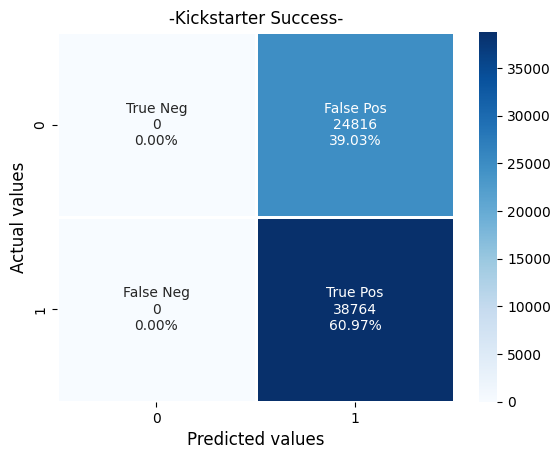

In [88]:
#Evaluation of the Decision tree classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_dt_gc)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_dt_gc)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.70      0.72     24816
           1       0.81      0.84      0.83     38764

    accuracy                           0.78     63580
   macro avg       0.77      0.77      0.77     63580
weighted avg       0.78      0.78      0.78     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[17364  7452]
 [ 6306 32458]]


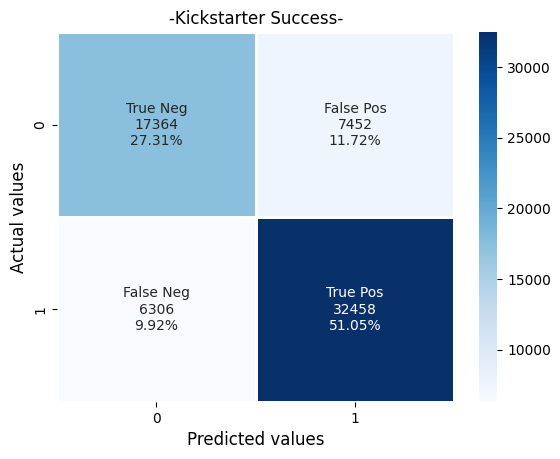

In [89]:
#Evaluation of the XGboost classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_boost_gc)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_boost_gc)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.62      0.64     24816
           1       0.77      0.80      0.78     38764

    accuracy                           0.73     63580
   macro avg       0.71      0.71      0.71     63580
weighted avg       0.72      0.73      0.73     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[15358  9458]
 [ 7866 30898]]


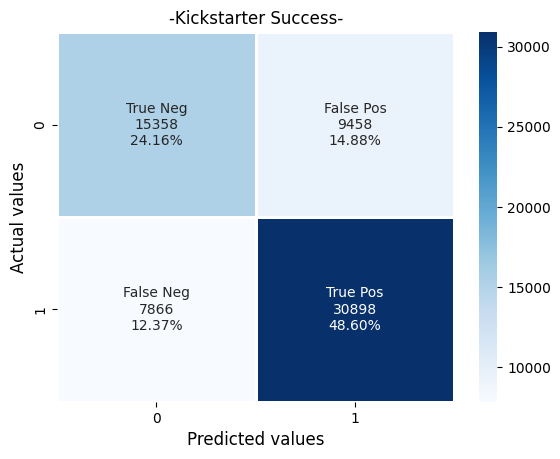

In [90]:
#Evaluation of the KNeighbors classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_neigh)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_neigh)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.42      0.54     24816
           1       0.71      0.90      0.79     38764

    accuracy                           0.71     63580
   macro avg       0.72      0.66      0.66     63580
weighted avg       0.72      0.71      0.69     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[10440 14376]
 [ 3748 35016]]


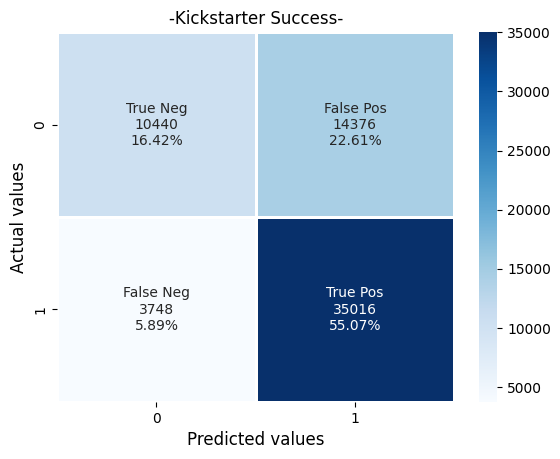

In [91]:
#Evaluation of the RandomForest classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_forest_gc)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_forest_gc)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

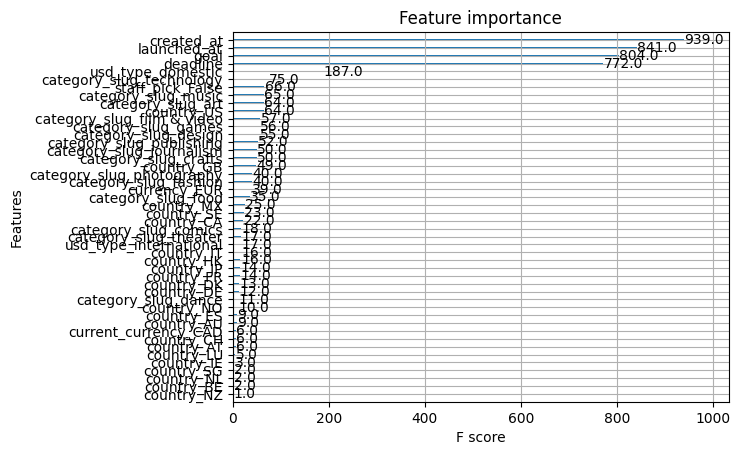

In [93]:
#show the importance of features for xgboost classifier
plot_importance(model_xgboost)
pyplot.show()

## Voting classifier out of all models

With this voting we can compare all our models an take the best one for our prediction

In [98]:
model_vote = VotingClassifier(estimators = [('xgb', best_model_boost), ('knn', neigh), ('dt', best_model_dtc), ('rf', best_model_forest)], voting = 'hard')
voted_model_fit = model_vote.fit(X_train,y_train)
voted_model_score = model_vote.score(X_test,y_test)
y_pred_vote = model_vote.predict(X_test)

In [105]:
print(model_vote)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1...
                                            max_leaves=0, min_child_weight=1,
                                      

In [106]:
model_vote.fit_transform(X_train,y_train)

array([[0, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       ...,
       [0, 0, 1, 0],
       [1, 1, 1, 1],
       [0, 1, 1, 0]])

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.62      0.67     24816
           1       0.78      0.87      0.82     38764

    accuracy                           0.77     63580
   macro avg       0.76      0.74      0.75     63580
weighted avg       0.77      0.77      0.76     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[15278  9538]
 [ 5175 33589]]


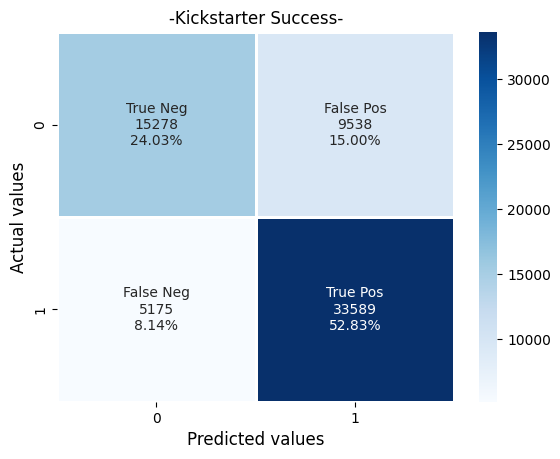

In [95]:
#Evaluation of the Voting Classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_vote)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_vote)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()